<a href="https://colab.research.google.com/github/ekinare/Factory_Ekin/blob/master/%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers import Input, LSTM, Dense, Embedding
from keras.models import Sequential, Model
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras.utils import plot_model
import keras.backend as K

from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.decomposition import PCA
import tensorflow as tf 

import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import time

import pandas as pd
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv('drive/My Drive/딥러닝/추천시스템유사도함수/grade_item.csv', sep=",")
data.head()
data.index=data.iloc[:,0]

data = data.drop("CUSTOMER", 1)
data.head()
len(data.columns)
data.PERFORM.value_counts()

data.shape

factor_sum=0

for i in range(data.shape[1]):
    #print(len(data.iloc[:,i].value_counts()))
    factor_sum +=len(data.iloc[:,i].value_counts())
    
print(factor_sum)
	
colnames=data.columns
from random import shuffle



1023


In [5]:

REP=1 # number of shuffled sentences
sentences = []
for i in range(data.shape[0]):
    if i%10000==0:
        print(i)
    for j in range(REP):
        sentence=list(colnames + data.iloc[i,:].map(str))
        np.random.shuffle(sentence)
        sentences.append(sentence)
    


0
10000
20000
30000
40000
50000
60000


In [6]:

from gensim.models import Word2Vec
embed_model = Word2Vec(sentences, sg=1, size=50, window=5, min_count=1)
embed_model.save("word2vec_ITEM_GRADE")
(embed_model.wv.vocab)
len(embed_model.wv.vocab) 
X = embed_model[embed_model.wv.vocab]
X.shape

index2word = {i: w for i, w in enumerate(embed_model.wv.index2word)} 
word2index = {w: i for i, w in index2word.items() }
len(word2index)
len(embed_model.wv.index2word)

word2index
(index2word.values())

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


dict_values(['LESR-ELEC2', 'BOOK8', 'FASH-MIS8', 'FURN-DESK2', 'FOOD-KIMCH8', 'LESR-SWIM8', 'FASH-JUR8', 'BEAT-MAST2', 'FOOD-DIET8', 'FOOD-AGR8', 'FURN-CHR2', 'LIFE-BATH5', 'BEAT-BODY2', 'FURN-CHID2', 'LESR-CAP8', 'FLOWER8', 'DIGI-AIR5', 'LESR-FISH8', 'FOOD-SIDI8', 'PERFORM5', 'DIGI-HARD8', 'LESR-BOX2', 'LESR-GOLF5', 'LESR-MTN2', 'FURN-KIT5', 'FOOD-MAR8', 'FOOD-DIET2', 'FOOD-PROC8', 'TRV-AIR2', 'BEAT-PERF8', 'BEAT-MAKE8', 'DIGI-AIR8', 'FASH-MIS5', 'FURN-REM5', 'BEAT-LOTT2', 'DIGI-SOUND2', 'CLOTH-MWAL5', 'LESR-HEAT8', 'BEAT-LOTT8', 'FURN-INN8', 'LESR-MTN8', 'CLOTH-WSHO5', 'FASH-MBAG8', 'LESR-BYKE2', 'FASH-MWAL2', 'DIGI-PRT8', 'LIFE-MOU2', 'LESR-CAP2', 'BEAT-ESSN2', 'LIFE-MASS8', 'DIGI-LIFE5', 'LIFE-PAP5', 'TRV-TIKE5', 'DIGI-PC2', 'ART8', 'FASH-WO5', 'BEAT-BODY8', 'FOOD-KIMCH2', 'CAT5', 'FLOWER2', 'BEAT-PERF5', 'FASH-MBAG2', 'DIGI-GAME8', 'FOOD-MAR2', 'OFFICE5', 'BEAT-HAIR2', 'FURN-BED8', 'FASH-WWAL8', 'LESR-OTH8', 'CLOTH-UND5', 'LESR-SWIM2', 'FASH-JUR5', 'LESR-SKI5', 'CLOTH-WATH8', 'LES

In [7]:

data_trans=[]
for i in range(data.shape[0]):
    sentence = sentences[i]
    tmp=[]
    for j in range(len(sentence)):
        tmp.append(X[word2index[sentence[j]]])
    data_trans.append(np.sum(tmp, axis=0)) # embedding vector를 합하여 한 id를 하나의 50-by-1 벡터로 표현 
    
    if i%10000==0:
        print(i)

data_trans2 = np.asarray(data_trans)
data_trans2.shape

pca = PCA(n_components=2)
result = pca.fit_transform(data_trans2)
result.shape

cho_idx = np.random.choice(len(result), 1000)
result2 = result[cho_idx ,]
result2


0
10000
20000
30000
40000
50000
60000


array([[-1.9747747 , -0.35321346],
       [ 1.1565644 , -0.5924907 ],
       [ 0.6020893 ,  1.4374444 ],
       ...,
       [-0.5015869 ,  0.13588771],
       [ 0.159888  ,  2.3418236 ],
       [-0.02948966, -2.091125  ]], dtype=float32)

In [8]:

cho_idx


array([10809, 36335, 39891, 58128, 69296, 53605, 61531, 57735, 47842,
       19045, 11933,  4699, 21129,  3895, 53220, 66880,  7418, 44462,
       13623, 25374, 29704, 51970, 55441, 22450, 12681, 23661, 32699,
        5832, 22517, 23577, 33488, 68203, 16792, 59437, 63873, 58290,
       22629, 40411, 28084, 63995, 43698, 61423, 54909, 66552, 50248,
       20740, 22852,  4803, 16700,  7625,  8036, 22062, 11646, 62457,
       26887, 51672,  6818, 22115,  6360, 58968, 17233, 28867,  4002,
        8753, 50135, 30564, 17125, 33414, 50163,  4162, 38448, 29098,
       22565, 46535, 62071, 49521, 62322,  2620,   480, 32174,  2132,
       34771, 21012,   578, 20175,  7149, 36728, 30812, 18790, 41456,
       13514, 26527, 34769, 38446, 49682, 34500, 34771, 21883, 56787,
       17260, 43815, 46316, 62589, 39547, 22429, 23416, 45474, 57847,
       23275, 68054, 50637, 69578, 64189, 59306, 62835, 26699, 53659,
       54871, 64890, 36970, 69150, 57303, 10749, 23729, 53490, 42998,
       15743, 13140,

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


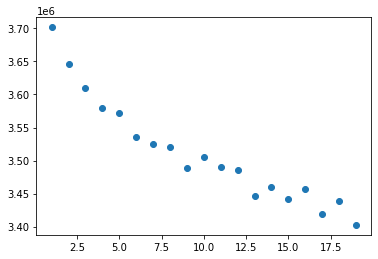

In [9]:

embed_model.score
len(data_trans)
from sklearn.cluster import MiniBatchKMeans

wss=[]
for i in range(1,20):
    kmeans=MiniBatchKMeans(n_clusters=i)
    kmeans.fit(data_trans)
    wss.append(kmeans.inertia_)
    print(i)
	
np.shape(data_trans)
plt.scatter(range(1,20), wss)
plt.show()

K=7
kmeans=MiniBatchKMeans(n_clusters=K)
kmeans.fit(data_trans)
clusters3 = kmeans.labels_
(clusters3)

clusters=clusters3
K=7
unique, counts = np.unique(clusters, return_counts=True)
clusters , K , unique , counts

n=data.shape[0]
H_C=0


In [0]:

for k in range(K): # k-th cluster
    n_k=counts[k]
    idx=np.where(clusters==k)
    n_category=0

    for j in range(data.shape[1]): # j-th attribute                
        x=data.iloc[idx[0], j]
        unique_x, counts_x = np.unique(x, return_counts=True)
        
        for m in range(len(counts_x)): # m-th category
            N_jk1=counts_x[m]
            H_C+=-(N_jk1/n_k * np.log(N_jk1/n_k)) * n_k / n
            n_category += 1        


In [12]:

N_jk1 , n_category
H_C

438.1614432407236

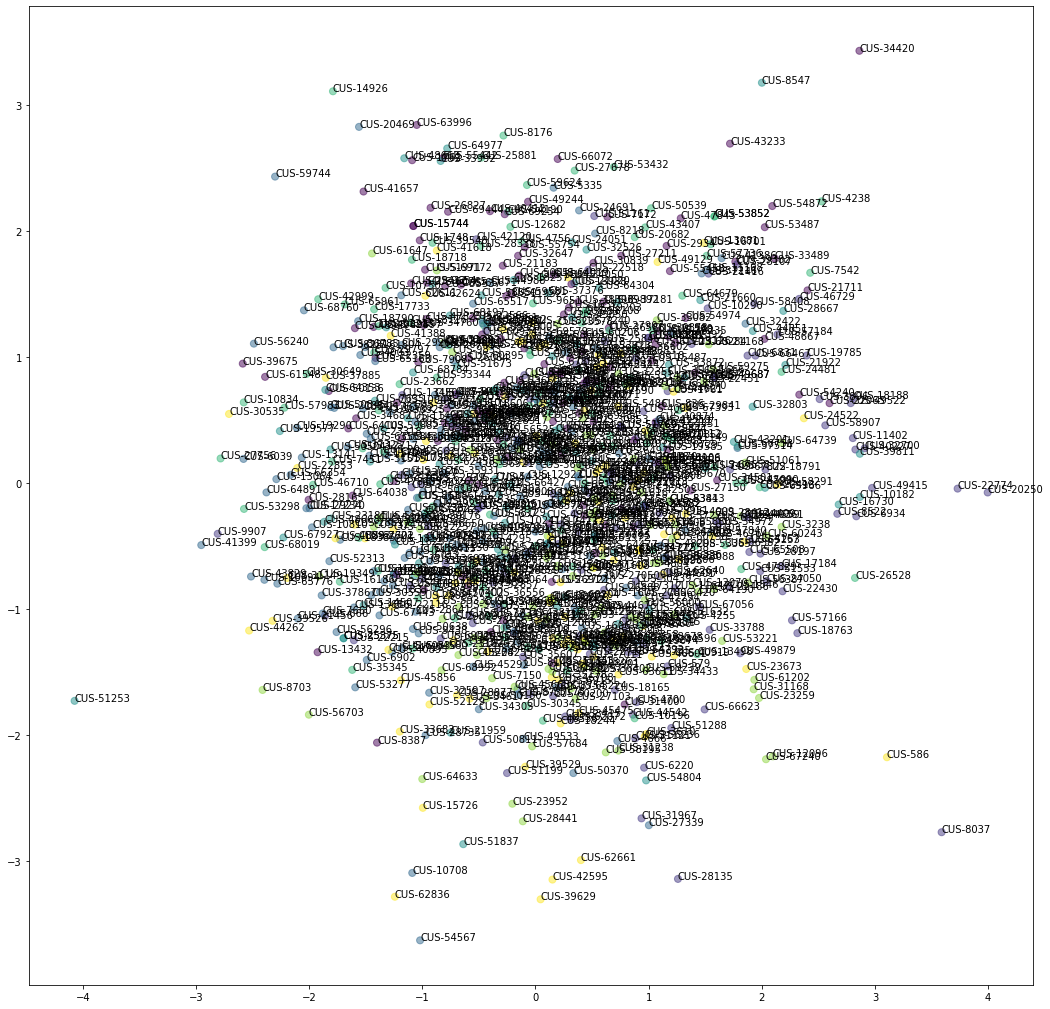

In [13]:

plt.figure(figsize=(18, 18)) 
area = 50
plt.scatter(result2[:, 0], result2[:, 1] , c=clusters[cho_idx]+1, s = area , alpha=0.5)
words = list(data.index[cho_idx])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result2[i, 0], result2[i, 1]))
plt.show()


clusters[cho_idx] ,  result2.shape

cus_names = list(data.index[cho_idx])
len(cus_names)

result3 = np.dot(result2 , result2.T)
result3

import pandas as pd 

df = pd.DataFrame(result3)
df.index = cus_names
df.columns = cus_names
df.to_csv("유사도_UBCF.csv")

